In [380]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [99]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [100]:
os.path.isfile("c:/Windows/Fonts/malgun.ttf")

True

Text(0.5, 1.0, '헬로')

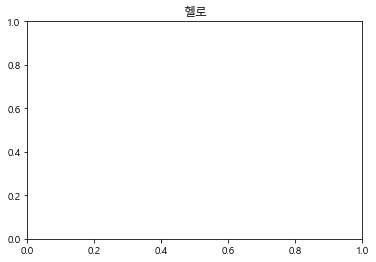

In [101]:
plt.title('헬로')

In [373]:
site_dict = {1:'K4', 2:'H2', 3:'H3', 4:'K2', 5:'K3', 6:'K5'}
class_kor = ['돼지', '모름', '멧돼지','흰배지빠귀','까마귀','다람쥐','호랑지빠귀','설치류','딱새','동고비','너구리']
class_eng = ['pig', 'unknown', 'boar', 'hinbejipagi', 'crow', 'squrrel', 'horangjipagi', 'rat', 'ddaksae', 'dongobi', 'racoon']
#class_eng = [None, None, None, 'hinbejipagi', 'crow', 'squrrel', 'horangjipagi', 'rat', 'ddaksae', 'dongobi', 'racoon']
#category = ['mammal', 'unknown', 'mammal', 'bird', 'bird', 'mammal', 'bird', 'mammal', 'bird', 'bird', 'mammal']
category = ['포유류', '조류', '포유류', '조류', '조류', '포유류', '조류', '포유류', '조류', '조류', '포유류']
#category = [None, None, None,          '조류', '조류', '포유류', '조류', '포유류', '조류', '조류', '포유류']
len(class_kor), len(class_eng)

(11, 11)

In [374]:
image_size = 334430
#16, 25, 3, 4 , 1,5 * 66%
i16 = 20175390931 //image_size
i25 = 17176365274 // image_size
i3 = 6992241170  // image_size
i4 = 8597581233 //image_size

iall = i16+i25+i3+i4
iall

158302

In [375]:
i1 = int(i16*0.66)
i6 = i16 - i1
i5 = int(i25*0.66)
i2 = i25 - i5
image_m = [i1, i2, i3, i4, i5, i6]
image_m

[39815, 17463, 20907, 25708, 33897, 20512]

In [378]:
site_dict, site_dict.values()

({1: 'K4', 2: 'H2', 3: 'H3', 4: 'K2', 5: 'K3', 6: 'K5'},
 dict_values(['K4', 'H2', 'H3', 'K2', 'K3', 'K5']))

In [412]:
box_csv = sorted(glob('box*.csv'))
box_csv

['box1.csv', 'box2.csv', 'box3.csv', 'box4.csv', 'box5.csv', 'box6.csv']

In [413]:
values = []
for path in box_csv:    
    df = pd.read_csv(path)
    print(path, df.shape, df['filename'].nunique())
    site = path[3:4]
    site = int(site)
    values.append([site, df['filename'].nunique(), len(df)])

box1.csv (4153, 7) 1980
box2.csv (855, 7) 402
box3.csv (7394, 7) 4313
box4.csv (6519, 7) 1849
box5.csv (1777, 7) 693
box6.csv (1041, 7) 332


### 라벨링 작업한 이미지와 박스의 개수

In [415]:
df_label_count = pd.DataFrame(values, columns=['site', 'image', 'bbox'])
df_label_count['site'] = df_label_count['site'].replace(site_dict)
df_label_count = df_label_count.set_index('site').sort_index()
df_label_count.loc['sum'] = df_label_count.sum()
df_label_count

,image,bbox
site,,
H2,402,855
H3,4313,7394
K2,1849,6519
K3,693,1777
K4,1980,4153
K5,332,1041
sum,9569,21739


### 딥러닝 모델 설명

검출 성능 recall, precision : 85%

In [160]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 02D7-513A

 C:\Users\mikael\Documents 디렉터리

2020-12-14  오후 02:03    <DIR>          .
2020-12-14  오후 02:03    <DIR>          ..
2020-12-14  오후 01:53    <DIR>          .ipynb_checkpoints
2020-12-14  오후 02:02         1,660,509 all.csv
2020-12-14  오후 01:48           718,134 box1.csv
2020-12-14  오후 01:58           147,209 box2.csv
2020-12-14  오후 01:58           203,415 box2.json
2020-12-14  오후 01:58           982,224 box3.csv
2020-12-14  오후 01:58         1,562,466 box3.json
2020-12-14  오후 01:48         1,150,853 box4.csv
2020-12-14  오후 01:48           302,807 box5.csv
2020-12-14  오후 01:48           177,140 box6.csv
2020-12-14  오전 09:36           605,682 pig _10-31.csv
2020-12-14  오후 01:49            83,345 pig_analysis.ipynb
2020-12-14  오후 02:03           546,716 pig_preprocess.ipynb
2020-12-14  오후 01:57    <DIR>          via-2.0.10
2020-12-14  오후 01:55         1,006,745 via-2.0.10.zip
2020-12-11  오후 03:20    <DIR>          네이트온 받은 파일
              13개 파일 

In [419]:
#path = 'C:/Users/mikael/Downloads/pig _10-31.csv'
path = 'pig _10-31.csv'
path = 'pig_10-31.csv'
os.path.isfile(path)

True

In [420]:
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0','temp', 'wat'])
df.shape

(16812, 3)

In [421]:
df.head(1)

,cls,site,date
0,pig,1,2020-09-03 12:54:16


In [422]:
df.dtypes

cls     object
site     int64
date    object
dtype: object

In [423]:
df.isna().sum().sum()

0

In [424]:
df['cls'].unique()

array(['pig', 'racoon', 'unknown', 'boar', 'hinbejipagi', 'crow',
       'squrrel', 'horangjipagi', 'rat', 'ddaksae', 'dongobi'],
      dtype=object)

In [425]:
df['site'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [426]:
df['date'].nunique()

5828

In [427]:
df.head()

,cls,site,date
0,pig,1,2020-09-03 12:54:16
1,pig,1,2020-09-03 12:59:56
2,pig,1,2020-09-03 13:02:46
3,pig,1,2020-09-03 13:05:36
4,pig,1,2020-09-03 13:08:27


In [428]:
'a' in ['a', 'b']

True

In [429]:
cls = df['cls'].values.copy()
for i in range(len(cls)):        
    c = cls[i]
    if c in ['pig', 'unknown', 'boar']:
        cls[i] = 0
    else:
        cls[i] = 1

np.unique(cls)

array([0, 1], dtype=object)

In [430]:
print(len(df))
df = df[cls>0]
print(len(df))

16812
10502


In [431]:
class_dict = dict()
category_dict = dict()
for e, k, c in zip(class_eng, class_kor, category):
    class_dict[e] = k
    category_dict[e] = c

In [432]:
df['category'] = df['cls'].replace(category_dict)
df['cls'] = df['cls'].replace(class_dict)

In [433]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [434]:
df['date'].min(), df['date'].max()

(Timestamp('2020-08-30 18:22:10'), Timestamp('2020-11-02 16:54:31'))

In [435]:
df.isna().sum().sum()

0

In [436]:
df = df.dropna()

In [437]:
len(df), df['date'].nunique()

(10502, 5295)

In [438]:
dfh = pd.get_dummies(df, prefix='', prefix_sep='')
dfh['site'] = dfh['site'].replace(site_dict)
dfh.head()

,site,date,까마귀,너구리,다람쥐,동고비,딱새,설치류,호랑지빠귀,흰배지빠귀,조류,포유류
10,K4,2020-09-03 23:48:19,0,1,0,0,0,0,0,0,0,1
11,K4,2020-09-03 23:51:07,0,1,0,0,0,0,0,0,0,1
12,K4,2020-09-05 01:26:39,0,1,0,0,0,0,0,0,0,1
13,K4,2020-09-05 01:29:29,0,1,0,0,0,0,0,0,0,1
14,K4,2020-09-05 01:32:19,0,1,0,0,0,0,0,0,0,1


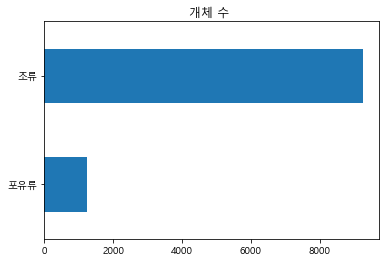

In [456]:
axe = dfh[['조류','포유류']].sum().sort_values().plot.barh(title='개체 수 ')

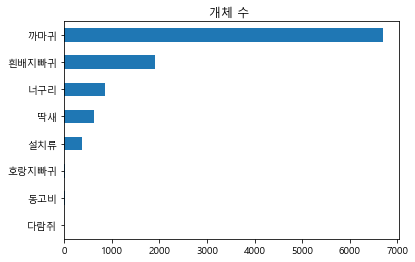

In [460]:
axe = dfh.drop(columns=['date','site', '조류','포유류']).sum().sort_values().plot.barh(title='개체 수 ')

In [439]:
dfh.groupby('site').sum().astype(int)

,까마귀,너구리,다람쥐,동고비,딱새,설치류,호랑지빠귀,흰배지빠귀,조류,포유류
site,,,,,,,,,,
H2,252,0,1,4,134,0,0,1,391,1
H3,2261,51,0,4,60,230,0,120,2445,281
K2,3862,123,0,0,428,112,18,1,4309,235
K3,146,671,0,0,0,0,0,0,146,671
K4,178,17,2,0,1,34,4,1787,1970,53


In [462]:
dfh.groupby('date').sum().resample('W').sum().fillna(0).astype(int)

,까마귀,너구리,다람쥐,동고비,딱새,설치류,호랑지빠귀,흰배지빠귀,조류,포유류
date,,,,,,,,,,
2020-08-30,4,0,0,0,0,0,0,0,4,0
2020-09-06,18,17,0,4,60,13,0,4,86,30
2020-09-13,587,29,0,4,134,9,0,117,842,38
2020-09-20,90,26,1,0,0,0,0,0,90,27
2020-09-27,92,679,0,0,353,91,17,1,463,770
2020-10-04,90,64,0,0,75,21,1,0,166,85
2020-10-11,2,0,0,0,0,0,0,0,2,0
2020-10-18,1755,40,0,0,0,74,0,185,1940,114
2020-10-25,124,0,2,0,0,15,1,671,796,17


In [464]:
freq_d = dfh[['date','조류','포유류']].groupby('date').mean().resample('D').mean().fillna(0)
freq_d.index = [str(v)[5:10] for v in freq_d.index.values]
freq_d

,조류,포유류
08-30,1.000000,0.000000
08-31,1.000000,0.000000
09-01,0.000000,0.000000
09-02,0.000000,0.000000
09-03,0.888889,0.111111
...,...,...
10-29,0.826087,0.173913
10-30,0.852423,0.147577
10-31,0.965909,0.034091
11-01,1.000000,0.000000


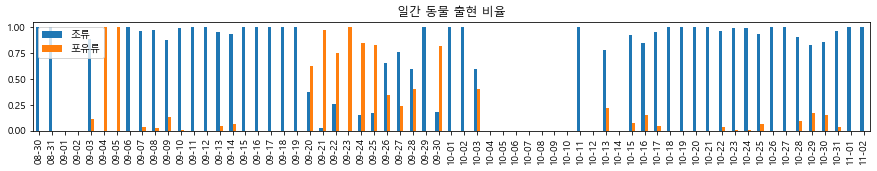

In [469]:
ax = freq_d.plot.bar(figsize=(15, 2), title='일간 동물 출현 비율')

In [441]:
freq_w = dfh[['date','조류','포유류']].groupby('date').mean().resample('W').mean()
freq_w.index = [str(v)[5:10] for v in freq_w.index.values]
freq_w

,조류,포유류
08-30,1.000000,0.000000
09-06,0.596154,0.403846
09-13,0.953819,0.046181
09-20,0.792135,0.207865
09-27,0.389526,0.610474
10-04,0.682028,0.317972
10-11,1.000000,0.000000
10-18,0.888183,0.111817
10-25,0.976124,0.023876
11-01,0.909197,0.090803


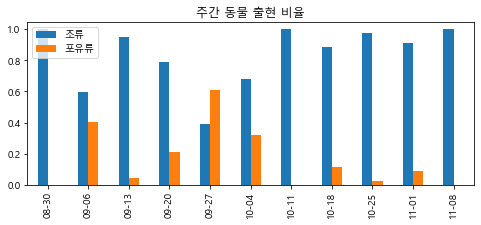

In [465]:
ax = freq_w.plot.bar(figsize=(8,3), title='주간 동물 출현 비율')

site 별 방문 동물 수

In [443]:
dfh.groupby('site').mean()

,까마귀,너구리,다람쥐,동고비,딱새,설치류,호랑지빠귀,흰배지빠귀,조류,포유류
site,,,,,,,,,,
H2,0.642857,0.000000,0.002551,0.010204,0.341837,0.000000,0.000000,0.002551,0.997449,0.002551
H3,0.829420,0.018709,0.000000,0.001467,0.022010,0.084373,0.000000,0.044021,0.896919,0.103081
K2,0.849912,0.027069,0.000000,0.000000,0.094190,0.024648,0.003961,0.000220,0.948283,0.051717
K3,0.178703,0.821297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178703,0.821297
K4,0.087988,0.008403,0.000989,0.000000,0.000494,0.016807,0.001977,0.883342,0.973801,0.026199


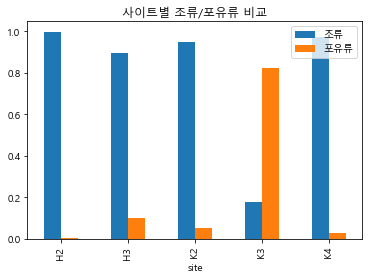

In [444]:
axe = dfh.groupby('site').mean()[['조류','포유류']].plot.bar(title='사이트별 조류/포유류 비교')

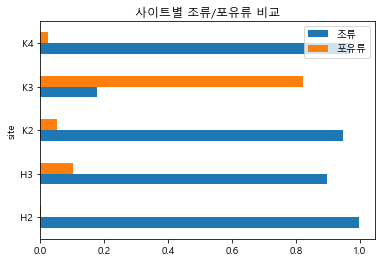

In [445]:
axe = dfh.groupby('site').mean()[['조류','포유류']].plot.barh(title='사이트별 조류/포유류 비교')

In [294]:
h6 = dfh.groupby('date').mean().resample('6h').mean().fillna(0)
n0 = h6.iloc[::4]
n1 = h6.iloc[1::4]
d0 = h6.iloc[2::4]
d1 = h6.iloc[3::4]
d = d0 + d1.values
n = n0 + n1.values

In [295]:
nsum = n.sum()
dsum = d.sum()
nsum

까마귀       3.391038
너구리      24.687928
다람쥐       0.000000
동고비       0.000000
딱새        1.514228
설치류      18.406806
호랑지빠귀     0.000000
흰배지빠귀     0.000000
조류        4.905266
포유류      43.094734
dtype: float64

In [277]:
nsum.index = [ind+'_낮' for ind in nsum.index]
dsum.index = [ind+'_밤' for ind in dsum.index]

In [290]:
ndsum = pd.concat((nsum, dsum))

In [306]:
ndsum.sort_index()

까마귀_낮       3.391038
까마귀_밤      54.467958
너구리_낮      24.687928
너구리_밤       3.063515
다람쥐_낮       0.000000
다람쥐_밤       0.096814
동고비_낮       0.000000
동고비_밤       0.111538
딱새_낮        1.514228
딱새_밤       10.942151
설치류_낮      18.406806
설치류_밤       0.000000
조류_낮        4.905266
조류_밤       88.839672
포유류_낮      43.094734
포유류_밤       3.160328
호랑지빠귀_낮     0.000000
호랑지빠귀_밤     0.109304
흰배지빠귀_낮     0.000000
흰배지빠귀_밤    23.208721
dtype: float64

<AxesSubplot:title={'center':'낮(Red)과 밤(Black) 비교 '}>

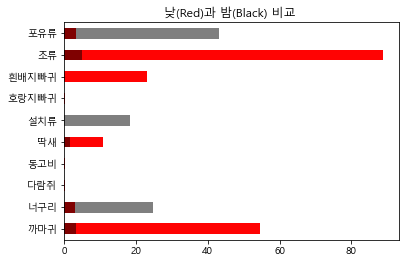

In [316]:
d.sum().plot.barh(alpha=0.99, color="red", title='낮(Red)과 밤(Black) 비교 ')
nsum.plot.barh(alpha=0.5, color="black")

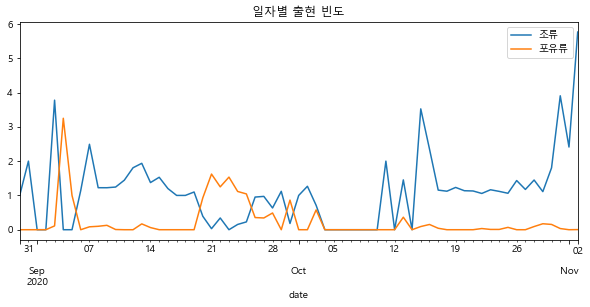

In [317]:
axe = dfh.groupby('date').sum().resample('D').mean().fillna(0)[['조류','포유류']].plot(figsize=(10, 4), title='일자b별 출현 빈도')

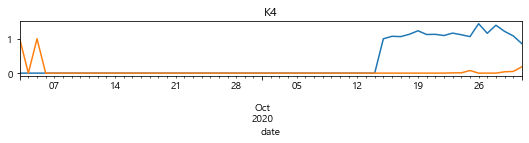

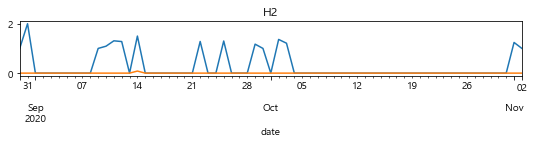

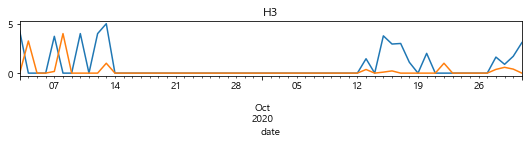

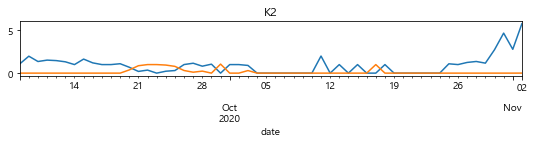

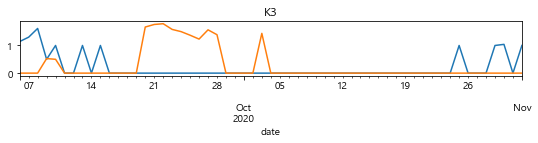

In [358]:
for site in dfh['site'].unique():
    data = dfh[dfh['site']==site].groupby('date').sum().resample('D').mean().fillna(0)[['조류','포유류']]
    ax = data.plot(figsize=(9, 1), legend=False, title=site)        

In [193]:
dfh.groupby(['site', 'date'])[['조류','포유류']].sum().loc['H2']#.resample('D').mean()#.fillna(0).plot(figsize=(10, 4))

,조류,포유류
date,,
2020-08-30 18:22:10,1,0
2020-08-30 18:25:19,1,0
2020-08-30 18:27:51,1,0
2020-08-30 18:30:41,1,0
2020-08-31 13:30:10,2,0
...,...,...
2020-11-01 10:38:16,1,0
2020-11-01 10:40:16,2,0
2020-11-01 10:42:14,1,0
